In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
from ALLCools.mcds import MCDS
from ALLCools.clustering import tsne, significant_pc_test, filter_regions, remove_black_list_region, lsi, binarize_matrix
from ALLCools.plot import *
import matplotlib as mpl
mpl.style.use('default')
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'Helvetica'

In [2]:
from ALLCools.clustering import tsne, significant_pc_test, log_scale

In [3]:
metadata = pd.read_csv('../metadata/GBM_metadata_9samples.csv', index_col = 0)
metadata

,Plate,PCRIndex,MultiplexGroup,RandomIndex,Col384,Row384,R1InputReads,R1InputReadsBP,R1WithAdapters,R1QualTrimBP,...,chr18_3c,chr11_3c,chr15_3c,chr16_3c,chr19_3c,chr20_3c,chrX_3c,chr21_3c,chr22_3c,type
cell,,,,,,,,,,,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,GBM_BT00009_Plate1,J2,1.0,A13,12.0,0.0,543811.0,75960330.0,329.0,130615.0,...,-0.169119,0.514556,-0.305797,-0.664611,-0.963400,-0.715979,-0.404173,-1.606505,-2.007092,malignant
GBM_BT00009_Plate1-1-J2-A14,GBM_BT00009_Plate1,J2,1.0,A14,13.0,0.0,1443841.0,205273886.0,871.0,450225.0,...,-0.331649,0.655225,-0.537022,-1.080347,-1.108881,-0.709778,-0.114430,-1.569391,-1.863723,malignant
GBM_BT00009_Plate1-1-J2-A1,GBM_BT00009_Plate1,J2,1.0,A1,0.0,0.0,1377070.0,195737508.0,790.0,417027.0,...,-0.674835,0.349795,-0.613550,-0.738597,-1.197165,-1.017747,-0.358494,-2.071587,-2.018895,non-malignant
GBM_BT00009_Plate1-1-J2-A2,GBM_BT00009_Plate1,J2,1.0,A2,1.0,0.0,1477121.0,209863296.0,1292.0,445281.0,...,-0.349739,0.642446,-0.353793,-1.160127,-0.898876,-0.670579,-0.289377,-1.697402,-1.799478,malignant
GBM_BT00009_Plate1-1-J2-B13,GBM_BT00009_Plate1,J2,1.0,B13,12.0,1.0,1424683.0,202180075.0,785.0,394992.0,...,-0.264942,0.758346,-0.422850,-1.248449,-1.067373,-0.706157,-0.348405,-1.774896,-1.533435,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,BT0010_AR_Plate8,G10,6.0,O24,23.0,14.0,2175912.0,309429847.0,1598.0,879107.0,...,-0.581149,0.481482,-0.460198,-0.486735,-1.550918,-0.513349,-0.380735,-2.178870,-1.792252,malignant
BT0010_AR_Plate8-6-G10-P11,BT0010_AR_Plate8,G10,6.0,P11,10.0,15.0,2564295.0,364706998.0,2144.0,1155269.0,...,-0.430892,0.395026,-0.427256,-0.423991,-1.515536,-0.815973,-0.319431,-2.199281,-1.762854,malignant
BT0010_AR_Plate8-6-G10-P12,BT0010_AR_Plate8,G10,6.0,P12,11.0,15.0,2563648.0,364577406.0,1772.0,863481.0,...,-0.627004,0.697641,-0.404231,-0.509844,-1.327841,-0.808388,-0.380319,-1.580718,-1.894935,malignant


In [4]:
mcds = MCDS.open('/gale/netapp/entex/GBM/*/matrix/*.mcds', var_dim='promoter')
mcds

<xarray.MCDS>
Dimensions:                     (mc_type: 2, cell: 14345, count_type: 2,
                                 promoter: 58870)
Coordinates:
  * mc_type                     (mc_type) <U3 'CGN' 'CHN'
  * cell                        (cell) <U37 'GBM_BT00009_Plate1-1-J2-A13' ......
  * count_type                  (count_type) <U3 'mc' 'cov'
  * promoter                    (promoter) <U24 'ENSG00000223972.5' ... 'ENSG...
    promoter_chrom              (promoter) <U5 dask.array<chunksize=(4096,), meta=np.ndarray>
    promoter_end                (promoter) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
    promoter_start              (promoter) int64 dask.array<chunksize=(4096,), meta=np.ndarray>
Data variables:
    promoter_da                 (cell, promoter, mc_type, count_type) uint32 dask.array<chunksize=(2869, 4096, 1, 1), meta=np.ndarray>
    promoter_da_CGN-hypo-score  (cell, promoter) float16 dask.array<chunksize=(2869, 4096), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  promoter

In [5]:
mcds.add_cell_metadata(metadata)
selc = metadata.index
mcds = mcds.sel(cell = mcds.get_index('cell').intersection(selc))
mcds = mcds.remove_black_list_region(black_list_path='/gale/netapp/home/hanliu/ref/blacklist/hg38-blacklist.v2.bed.gz')


/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


1794 promoter features removed due to overlapping (bedtools intersect -f 0.2) with black list regions.


# calculate chromosome mcg fraction

### This is done by dividing the sum of mCG of that chrm by the sum of coverage of that chrm


In [12]:
mcds_chr = mcds.sel(promoter = (mcds['promoter_chrom'].values=='chr10'), mc_type = 'CGN')
mcg_df = mcds_chr.sel(count_type = 'mc').sum(dim='promoter').to_pandas()
covcg_df = mcds_chr.sel(count_type = 'cov').sum(dim='promoter').to_pandas()
chr10 = mcg_df['promoter_da'].div(covcg_df['promoter_da'])
chr10

cell
GBM_BT00009_Plate1-1-J2-A13    0.728525
GBM_BT00009_Plate1-1-J2-A14    0.717674
GBM_BT00009_Plate1-1-J2-A1     0.794792
GBM_BT00009_Plate1-1-J2-A2     0.739693
GBM_BT00009_Plate1-1-J2-B13    0.731974
                                 ...   
BT0010_AR_Plate8-6-G10-O24     0.812441
BT0010_AR_Plate8-6-G10-P11     0.798939
BT0010_AR_Plate8-6-G10-P12     0.823578
BT0010_AR_Plate8-6-G10-P23     0.754067
BT0010_AR_Plate8-6-G10-P24     0.800660
Name: promoter_da, Length: 11053, dtype: float64

In [13]:
chr10 = pd.DataFrame(chr10)
chr10.columns = ['chr10_mcg']
chr10

,chr10_mcg
cell,
GBM_BT00009_Plate1-1-J2-A13,0.728525
GBM_BT00009_Plate1-1-J2-A14,0.717674
GBM_BT00009_Plate1-1-J2-A1,0.794792
GBM_BT00009_Plate1-1-J2-A2,0.739693
GBM_BT00009_Plate1-1-J2-B13,0.731974
...,...
BT0010_AR_Plate8-6-G10-O24,0.812441
BT0010_AR_Plate8-6-G10-P11,0.798939
BT0010_AR_Plate8-6-G10-P12,0.823578


In [15]:
chrm10 = chr10

In [16]:
mcds_chr = mcds.sel(promoter= (mcds['promoter_chrom'].values=='chr1'), mc_type = 'CGN')
mcg_df = mcds_chr.sel(count_type = 'mc').sum(dim='promoter').to_pandas()
covcg_df = mcds_chr.sel(count_type = 'cov').sum(dim='promoter').to_pandas()
chrm =pd.DataFrame( mcg_df['promoter_da'].div(covcg_df['promoter_da']))
chrm.columns = ['chr1_mcg']
chr10 = chr10.join(chrm)
mcds_chr = mcds.sel(promoter= (mcds['promoter_chrom'].values=='chr7'), mc_type = 'CGN')
mcg_df = mcds_chr.sel(count_type = 'mc').sum(dim='promoter').to_pandas()
covcg_df = mcds_chr.sel(count_type = 'cov').sum(dim='promoter').to_pandas()
chrm = pd.DataFrame(mcg_df['promoter_da'].div(covcg_df['promoter_da']))
chrm.columns = ['chr7_mcg']
chr10 = chr10.join(chrm)
chr10

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


,chr10_mcg,chr1_mcg,chr7_mcg
cell,,,
GBM_BT00009_Plate1-1-J2-A13,0.728525,0.710975,0.735820
GBM_BT00009_Plate1-1-J2-A14,0.717674,0.718761,0.739542
GBM_BT00009_Plate1-1-J2-A1,0.794792,0.776086,0.799832
GBM_BT00009_Plate1-1-J2-A2,0.739693,0.708813,0.729970
GBM_BT00009_Plate1-1-J2-B13,0.731974,0.703982,0.731701
...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.812441,0.782713,0.808961
BT0010_AR_Plate8-6-G10-P11,0.798939,0.769331,0.795193
BT0010_AR_Plate8-6-G10-P12,0.823578,0.787299,0.814455


In [17]:
mcg_chr10 = chr10.join(metadata[['type','Sample','mCGmC', 'mCGCov', 'mCGFrac']])
mcg_chr10

,chr10_mcg,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac
cell,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.728525,0.710975,0.735820,malignant,GBM_BT00009,422258.0,617300.0,0.684040
GBM_BT00009_Plate1-1-J2-A14,0.717674,0.718761,0.739542,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243
GBM_BT00009_Plate1-1-J2-A1,0.794792,0.776086,0.799832,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034
GBM_BT00009_Plate1-1-J2-A2,0.739693,0.708813,0.729970,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418
GBM_BT00009_Plate1-1-J2-B13,0.731974,0.703982,0.731701,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570
...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.812441,0.782713,0.808961,malignant,BT0010_AR,1969466.0,2452807.0,0.802944
BT0010_AR_Plate8-6-G10-P11,0.798939,0.769331,0.795193,malignant,BT0010_AR,2241847.0,2845655.0,0.787814
BT0010_AR_Plate8-6-G10-P12,0.823578,0.787299,0.814455,malignant,BT0010_AR,2336266.0,2889914.0,0.808421


# with normalization within cells

In [5]:
mcds.add_mc_frac(
normalize_per_cell=True,  # after calculating mC frac, per cell normalize the matrix
    clip_norm_value=10  # clip outlier values above 10 to 10
)

In [8]:
mcds['chrom100k_da_frac'].load()

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))


<xarray.DataArray 'chrom100k_da_frac' (cell: 11053, chrom100k: 28494, mc_type: 2)>
array([[[ 1.10148838,  0.08830935],
        [ 0.63365123,  1.68836229],
        [ 0.78231688, 10.        ],
        ...,
        [ 0.76472605,  0.16118347],
        [ 0.76471606,  0.825499  ],
        [ 0.59987324,  1.92733326]],

       [[ 0.61668452,  0.64236307],
        [ 0.51659068,  1.07212853],
        [ 0.65079534,  0.70594553],
        ...,
        [ 0.76088472,  0.38073664],
        [ 0.70292567,  0.92830244],
        [ 0.49130926,  0.98974776]],

       [[ 0.98639084,  0.44719975],
        [ 0.70917085,  0.65312329],
        [ 0.76972477,  1.26241142],
        ...,
...
        ...,
        [ 0.97388283,  0.70143464],
        [ 0.7178507 ,  0.37400117],
        [ 0.74764425,  0.3463932 ]],

       [[ 1.02031802,  0.72609482],
        [ 0.70451621,  0.95550597],
        [ 0.86651511,  0.54452393],
        ...,
        [ 1.06990411,  0.85301645],
        [ 0.8736072 ,  1.12021584],
        [ 0.92141558,  0.75672795]],

       [[ 0.59617456,  0.91630379],
        [ 0.92739111,  0.65047941],
        [ 0.77432418,  0.94365201],
        ...,
        [ 1.03905366,  0.64419517],
        [ 0.92751263,  0.45337039],
        [ 0.75316161,  0.63321192]]])
Coordinates: (12/107)
  * mc_type                   (mc_type) <U3 'CGN' 'CHN'
  * cell                      (cell) object 'GBM_BT00009_Plate1-1-J2-A13' ......
  * chrom100k                 (chrom100k) <U10 'chr1_8' 'chr1_9' ... 'chrY_265'
    chrom100k_chrom           (chrom100k) <U5 'chr1' 'chr1' ... 'chrY' 'chrY'
    chrom100k_end             (chrom100k) int64 900000 1000000 ... 26600000
    chrom100k_start           (chrom100k) int64 800000 900000 ... 26500000
    ...                        ...
    cell_chr19_3c             (cell) float64 -0.9634 -1.109 ... -0.9354 -1.513
    cell_chr20_3c             (cell) float64 -0.716 -0.7098 ... -0.8856 -0.683
    cell_chrX_3c              (cell) float64 -0.4042 -0.1144 ... -0.5174 -0.6492
    cell_chr21_3c             (cell) float64 -1.607 -1.569 ... -2.467 -2.227
    cell_chr22_3c             (cell) float64 -2.007 -1.864 ... -1.73 -1.599
    cell_type                 (cell) object 'malignant' ... 'malignant'

In [16]:
# mch_adata = mcds.get_adata(mc_type='CHN',
#                            var_dim='chrom100k',
#                            select_hvf=False)
# #log_scale(mch_adata)
# mch_adata

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/ALLCools/mcds/mcds.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  obs_df[coord_prefix.sub("", k)] = series


AnnData object with n_obs × n_vars = 11053 × 28494
    obs: 'Plate', 'PCRIndex', 'MultiplexGroup', 'RandomIndex', 'Col384', 'Row384', 'R1InputReads', 'R1InputReadsBP', 'R1WithAdapters', 'R1QualTrimBP', 'R1TrimmedReads', 'R1TrimmedReadsBP', 'R1TrimmedReadsRate', 'R1UniqueMappedReads', 'R1DeduppedReads', 'R2InputReads', 'R2InputReadsBP', 'R2WithAdapters', 'R2QualTrimBP', 'R2TrimmedReads', 'R2TrimmedReadsBP', 'R2TrimmedReadsRate', 'R2UniqueMappedReads', 'R2DeduppedReads', 'CisShortContact', 'CisLongContact', 'TransContact', 'mCHmC', 'mCHCov', 'mCHFrac', 'mCGmC', 'mCGCov', 'mCGFrac', 'mCCCmC', 'mCCCCov', 'mCCCFrac', 'GenomeCov', 'LambdaCYFrac', 'LambdaCYCov', 'FinalmCReads', 'CellInputReadPairs', 'R1MappingRate', 'R2MappingRate', 'R1DuplicationRate', 'R2DuplicationRate', 'CellBarcodeRatio', 'TotalContacts', 'CisShortRatio', 'CisLongRatio', 'TransRatio', 'Sample', 'umap_0', 'umap_1', 'leiden', '5k_leiden', 'chr1mcgcov', 'chr2mcgcov', 'chr3mcgcov', 'chr4mcgcov', 'chr5mcgcov', 'chr6mcgcov', '

In [17]:
mcg_adata = mcds.get_adata(mc_type='CGN',
                           var_dim='promoter',
                           select_hvf=False)
#log_scale(mcg_adata)
mcg_adata

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/ALLCools/mcds/mcds.py:36: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  obs_df[coord_prefix.sub("", k)] = series


AnnData object with n_obs × n_vars = 11053 × 28494
    obs: 'Plate', 'PCRIndex', 'MultiplexGroup', 'RandomIndex', 'Col384', 'Row384', 'R1InputReads', 'R1InputReadsBP', 'R1WithAdapters', 'R1QualTrimBP', 'R1TrimmedReads', 'R1TrimmedReadsBP', 'R1TrimmedReadsRate', 'R1UniqueMappedReads', 'R1DeduppedReads', 'R2InputReads', 'R2InputReadsBP', 'R2WithAdapters', 'R2QualTrimBP', 'R2TrimmedReads', 'R2TrimmedReadsBP', 'R2TrimmedReadsRate', 'R2UniqueMappedReads', 'R2DeduppedReads', 'CisShortContact', 'CisLongContact', 'TransContact', 'mCHmC', 'mCHCov', 'mCHFrac', 'mCGmC', 'mCGCov', 'mCGFrac', 'mCCCmC', 'mCCCCov', 'mCCCFrac', 'GenomeCov', 'LambdaCYFrac', 'LambdaCYCov', 'FinalmCReads', 'CellInputReadPairs', 'R1MappingRate', 'R2MappingRate', 'R1DuplicationRate', 'R2DuplicationRate', 'CellBarcodeRatio', 'TotalContacts', 'CisShortRatio', 'CisLongRatio', 'TransRatio', 'Sample', 'umap_0', 'umap_1', 'leiden', '5k_leiden', 'chr1mcgcov', 'chr2mcgcov', 'chr3mcgcov', 'chr4mcgcov', 'chr5mcgcov', 'chr6mcgcov', '

In [39]:
chr10 = mcg_adata[:,mcg_adata.var['chrom']=='chr10']
mcg_chr10 = pd.DataFrame( {'chr10_mcg': chr10.X.mean(axis = 1)}, index = chr10.obs.index)
mcg_chr10 = mcg_chr10.join(metadata[['type','Sample','mCGmC', 'mCGCov', 'mCGFrac']])
mcg_chr10

,chr10_mcg,type,Sample,mCGmC,mCGCov,mCGFrac
cell,,,,,,
GBM_BT00009_Plate1-1-J2-A13,1.014008,malignant,GBM_BT00009,422258.0,617300.0,0.684040
GBM_BT00009_Plate1-1-J2-A14,0.997400,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243
GBM_BT00009_Plate1-1-J2-A1,0.998946,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034
GBM_BT00009_Plate1-1-J2-A2,1.001853,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418
GBM_BT00009_Plate1-1-J2-B13,1.012557,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570
...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,1.001359,malignant,BT0010_AR,1969466.0,2452807.0,0.802944
BT0010_AR_Plate8-6-G10-P11,1.000623,malignant,BT0010_AR,2241847.0,2845655.0,0.787814
BT0010_AR_Plate8-6-G10-P12,1.000125,malignant,BT0010_AR,2336266.0,2889914.0,0.808421


In [29]:
mcg_chr10[(mcg_chr10['type']=='non-malignant')& (mcg_chr10['Sample']== sample)]['chr10_mcg']

cell
CW_2209_1-CW_2209_2-A10-AD001    0.748751
CW_2209_1-CW_2209_2-A10-AD002    0.729883
CW_2209_1-CW_2209_2-C10-AD006    0.731287
CW_2209_1-CW_2209_2-C10-AD008    0.706633
CW_2209_1-CW_2209_2-D10-AD004    0.727866
                                   ...   
CW_2209_3-CW_2209_4-G9-AD001     0.730609
CW_2209_3-CW_2209_4-G9-AD004     0.737622
CW_2209_3-CW_2209_4-H9-AD007     0.733411
CW_2209_3-CW_2209_4-H9-AD008     0.716203
CW_2209_3-CW_2209_4-H9-AD010     0.734919
Name: chr10_mcg, Length: 174, dtype: float64

In [30]:
sample = 'CW_2209'
baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')&(mcg_chr10['Sample']== sample)]['chr10_mcg'].mean()
mcg_chr10['chr10mcg_cancer-normal'] = mcg_chr10['chr10_mcg'] - baseline
mcg_chr10

,chr10_mcg,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac,chr10mcg_cancer-normal,chr7mcg_cancer-normal,chr1mcg_cancer-normal
cell,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.728525,0.710975,0.735820,malignant,GBM_BT00009,422258.0,617300.0,0.684040,0.000642,-0.010378,-0.011663
GBM_BT00009_Plate1-1-J2-A14,0.717674,0.718761,0.739542,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243,-0.010209,-0.006656,-0.003877
GBM_BT00009_Plate1-1-J2-A1,0.794792,0.776086,0.799832,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034,0.066909,0.053634,0.053447
GBM_BT00009_Plate1-1-J2-A2,0.739693,0.708813,0.729970,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418,0.011810,-0.016228,-0.013826
GBM_BT00009_Plate1-1-J2-B13,0.731974,0.703982,0.731701,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570,0.004091,-0.014497,-0.018656
...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.812441,0.782713,0.808961,malignant,BT0010_AR,1969466.0,2452807.0,0.802944,0.084558,0.062764,0.060074
BT0010_AR_Plate8-6-G10-P11,0.798939,0.769331,0.795193,malignant,BT0010_AR,2241847.0,2845655.0,0.787814,0.071056,0.048996,0.046692
BT0010_AR_Plate8-6-G10-P12,0.823578,0.787299,0.814455,malignant,BT0010_AR,2336266.0,2889914.0,0.808421,0.095695,0.068257,0.064661


In [31]:
mcg_df = mcg_chr10

run the comment line if using normalized data from get adata

In [32]:
# chr10 = mcg_adata[:,mcg_adata.var['chrom']=='chr7']
# mcg_chr7 = pd.DataFrame( {'chr7_mcg': chr10.X.mean(axis = 1)}, index = chr10.obs.index)
# mcg_chr10 = mcg_chr10.join(mcg_chr7)

NameError: name 'mcg_adata' is not defined

In [33]:
baseline = mcg_chr10[mcg_chr10['type']=='non-malignant']['chr7_mcg'].mean()
mcg_chr10['chr7mcg_cancer-normal'] = mcg_chr10['chr7_mcg'] - baseline
mcg_chr10

,chr10_mcg,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac,chr10mcg_cancer-normal,chr7mcg_cancer-normal,chr1mcg_cancer-normal
cell,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.728525,0.710975,0.735820,malignant,GBM_BT00009,422258.0,617300.0,0.684040,0.000642,-0.010378,-0.011663
GBM_BT00009_Plate1-1-J2-A14,0.717674,0.718761,0.739542,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243,-0.010209,-0.006656,-0.003877
GBM_BT00009_Plate1-1-J2-A1,0.794792,0.776086,0.799832,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034,0.066909,0.053634,0.053447
GBM_BT00009_Plate1-1-J2-A2,0.739693,0.708813,0.729970,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418,0.011810,-0.016228,-0.013826
GBM_BT00009_Plate1-1-J2-B13,0.731974,0.703982,0.731701,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570,0.004091,-0.014497,-0.018656
...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.812441,0.782713,0.808961,malignant,BT0010_AR,1969466.0,2452807.0,0.802944,0.084558,0.062764,0.060074
BT0010_AR_Plate8-6-G10-P11,0.798939,0.769331,0.795193,malignant,BT0010_AR,2241847.0,2845655.0,0.787814,0.071056,0.048996,0.046692
BT0010_AR_Plate8-6-G10-P12,0.823578,0.787299,0.814455,malignant,BT0010_AR,2336266.0,2889914.0,0.808421,0.095695,0.068257,0.064661


In [ ]:
# chr10 = mcg_adata[:,mcg_adata.var['chrom']=='chr1']
# mcg_chr1 = pd.DataFrame( {'chr1_mcg': chr10.X.mean(axis = 1)}, index = chr10.obs.index)
# mcg_chr10 = mcg_chr10.join(mcg_chr1)

In [34]:
baseline = mcg_chr10[mcg_chr10['type']=='non-malignant']['chr1_mcg'].mean()
mcg_chr10['chr1mcg_cancer-normal'] = mcg_chr10['chr1_mcg'] - baseline
mcg_chr10

,chr10_mcg,chr1_mcg,chr7_mcg,type,Sample,mCGmC,mCGCov,mCGFrac,chr10mcg_cancer-normal,chr7mcg_cancer-normal,chr1mcg_cancer-normal
cell,,,,,,,,,,,
GBM_BT00009_Plate1-1-J2-A13,0.728525,0.710975,0.735820,malignant,GBM_BT00009,422258.0,617300.0,0.684040,0.000642,-0.010378,-0.011663
GBM_BT00009_Plate1-1-J2-A14,0.717674,0.718761,0.739542,malignant,GBM_BT00009,1291647.0,1795842.0,0.719243,-0.010209,-0.006656,-0.003877
GBM_BT00009_Plate1-1-J2-A1,0.794792,0.776086,0.799832,non-malignant,GBM_BT00009,1385482.0,1742671.0,0.795034,0.066909,0.053634,0.053447
GBM_BT00009_Plate1-1-J2-A2,0.739693,0.708813,0.729970,malignant,GBM_BT00009,1252881.0,1763582.0,0.710418,0.011810,-0.016228,-0.013826
GBM_BT00009_Plate1-1-J2-B13,0.731974,0.703982,0.731701,malignant,GBM_BT00009,1201461.0,1717427.0,0.699570,0.004091,-0.014497,-0.018656
...,...,...,...,...,...,...,...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.812441,0.782713,0.808961,malignant,BT0010_AR,1969466.0,2452807.0,0.802944,0.084558,0.062764,0.060074
BT0010_AR_Plate8-6-G10-P11,0.798939,0.769331,0.795193,malignant,BT0010_AR,2241847.0,2845655.0,0.787814,0.071056,0.048996,0.046692
BT0010_AR_Plate8-6-G10-P12,0.823578,0.787299,0.814455,malignant,BT0010_AR,2336266.0,2889914.0,0.808421,0.095695,0.068257,0.064661


In [38]:
sample = 'CCF_3571'
baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')]['chr10_mcg'].mean()
mcg_chr10['chr10mcg_cancer-normal'] = mcg_chr10['chr10_mcg'] - baseline

baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')]['chr7_mcg'].mean()
mcg_chr10['chr7mcg_cancer-normal'] = mcg_chr10['chr7_mcg'] - baseline

baseline = mcg_chr10[(mcg_chr10['type']=='non-malignant')]['chr1_mcg'].mean()
mcg_chr10['chr1mcg_cancer-normal'] = mcg_chr10['chr1_mcg'] - baseline


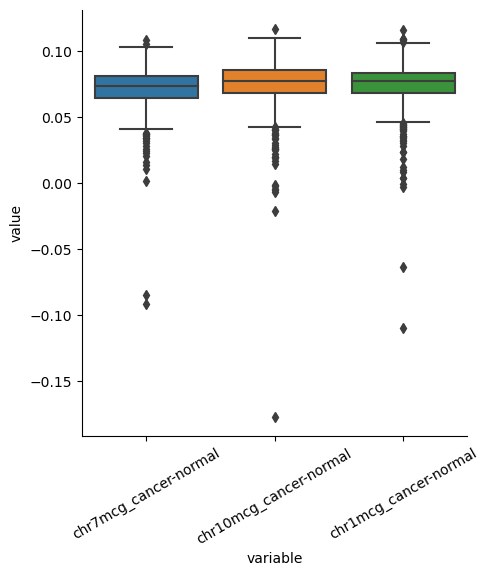

In [39]:
tmp = mcg_chr10[['chr7mcg_cancer-normal','chr10mcg_cancer-normal',
                  'chr1mcg_cancer-normal','Sample','type']]
tmp = tmp[(tmp['Sample'] == sample)&(tmp['type'] == 'malignant')]

tmp = pd.melt(tmp,id_vars=['Sample','type'], value_vars = ['chr7mcg_cancer-normal','chr10mcg_cancer-normal',
                  'chr1mcg_cancer-normal'])

ax = sns.catplot(data = tmp, kind = 'box', x='variable', y = 'value')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


In [ ]:
chr7 = mcg_adata[:,mcg_adata.var['chrom']=='chr7']

# chr7 CNV

In [40]:
mcds_chr = mcds.sel(promoter= (mcds['promoter_chrom'].values=='chr1'), mc_type = 'CGN')
mcds_chr

/gale/netapp/home2/yuwu/miniconda3/envs/allcools/lib/python3.8/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


<xarray.MCDS>
Dimensions:                     (cell: 11053, count_type: 2, promoter: 5266)
Coordinates: (12/108)
    mc_type                     <U3 'CGN'
  * cell                        (cell) object 'GBM_BT00009_Plate1-1-J2-A13' ....
  * count_type                  (count_type) <U3 'mc' 'cov'
  * promoter                    (promoter) <U24 'ENSG00000230092.7' ... 'ENSG...
    promoter_chrom              (promoter) <U5 dask.array<chunksize=(4030,), meta=np.ndarray>
    promoter_end                (promoter) int64 dask.array<chunksize=(4030,), meta=np.ndarray>
    ...                          ...
    cell_chr19_3c               (cell) float64 -0.9634 -1.109 ... -0.9354 -1.513
    cell_chr20_3c               (cell) float64 -0.716 -0.7098 ... -0.8856 -0.683
    cell_chrX_3c                (cell) float64 -0.4042 -0.1144 ... -0.6492
    cell_chr21_3c               (cell) float64 -1.607 -1.569 ... -2.467 -2.227
    cell_chr22_3c               (cell) float64 -2.007 -1.864 ... -1.73 -1.599
    cell_type                   (cell) object 'malignant' ... 'malignant'
Data variables:
    promoter_da                 (cell, promoter, count_type) uint32 dask.array<chunksize=(2189, 4030, 1), meta=np.ndarray>
    promoter_da_CGN-hypo-score  (cell, promoter) float16 dask.array<chunksize=(2189, 4030), meta=np.ndarray>
Attributes:
    obs_dim:  cell
    var_dim:  promoter

In [42]:
mcds_7_1 = mcds_chr.sel(promoter = mcds_chr['promoter'][:1200],count_type = 'mc').sum(dim='promoter').to_pandas()
mcds_7_2 = mcds_chr.sel(promoter = mcds_chr['promoter'][1200:],count_type = 'mc').sum(dim='promoter').to_pandas()
covcg_df_1 = mcds_chr.sel(promoter = mcds_chr['promoter'][:1200],count_type = 'cov').sum(dim='promoter').to_pandas()
covcg_df_2 = mcds_chr.sel(promoter = mcds_chr['promoter'][1200:],count_type = 'cov').sum(dim='promoter').to_pandas()
chrm_1 = pd.DataFrame(mcds_7_1['promoter_da'].div(covcg_df_1['promoter_da']))
chrm_1.columns = ['chr7_1_mcg']
chrm_2 = pd.DataFrame(mcds_7_2['promoter_da'].div(covcg_df_2['promoter_da']))
chrm_2.columns = ['chr7_2_mcg']

chrm7 = chrm_1.join(chrm_2)
chrm7 = chrm7.join(metadata[['type','Sample']])
chrm7

,chr7_1_mcg,chr7_2_mcg,type,Sample
cell,,,,
GBM_BT00009_Plate1-1-J2-A13,0.694767,0.717238,malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-A14,0.704280,0.725147,malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-A1,0.768042,0.779648,non-malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-A2,0.683292,0.719533,malignant,GBM_BT00009
GBM_BT00009_Plate1-1-J2-B13,0.673394,0.714264,malignant,GBM_BT00009
...,...,...,...,...
BT0010_AR_Plate8-6-G10-O24,0.781180,0.783150,malignant,BT0010_AR
BT0010_AR_Plate8-6-G10-P11,0.763836,0.770912,malignant,BT0010_AR
BT0010_AR_Plate8-6-G10-P12,0.766453,0.793539,malignant,BT0010_AR


In [82]:

baseline = chrm7[(chrm7['type']=='non-malignant')]['chr7_1_mcg'].mean()
chrm7['chr7_1_mcg_cancer-normal'] = chrm7['chr7_1_mcg'] - baseline

baseline = chrm7[(chrm7['type']=='non-malignant')]['chr7_2_mcg'].mean()
chrm7['chr7_2_mcg_cancer-normal'] = chrm7['chr7_2_mcg'] - baseline


In [79]:
tmp

,Sample,type,variable,value
0,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.053801
1,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.059610
2,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.041337
3,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.061610
4,CCF_3571,malignant,chr7_1_mcg_cancer-normal,0.054314
...,...,...,...,...
1735,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.089164
1736,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.089138
1737,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.088543
1738,CCF_3571,malignant,chr7_2_mcg_cancer-normal,0.103194


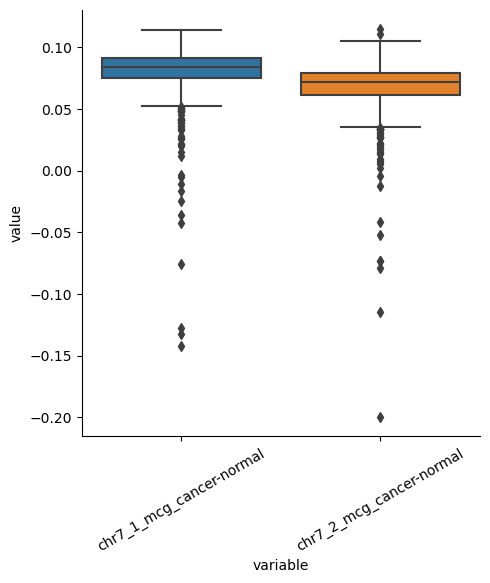

In [84]:
sample = 'CCF_3571'
tmp = chrm7[['chr7_1_mcg_cancer-normal','chr7_2_mcg_cancer-normal',
                  'Sample','type']]
tmp = tmp[(tmp['Sample'] == sample)&(tmp['type'] == 'malignant')]

tmp = pd.melt(tmp,id_vars=['Sample','type'], value_vars = ['chr7_1_mcg_cancer-normal','chr7_2_mcg_cancer-normal'])

ax = sns.catplot(data = tmp, kind = 'box', x='variable', y = 'value')
ax.set_xticklabels(ax.axes.flat[0].get_xticklabels(),rotation = 30)


In [71]:
from scipy.stats import wilcoxon
a = tmp[tmp['variable']=='chr7_1_mcg_cancer-normal']['value']
b = tmp[tmp['variable']=='chr7_2_mcg_cancer-normal']['value']
wilcoxon(a,b)

WilcoxonResult(statistic=152519.0, pvalue=5.667377994718764e-23)